In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Loading dataset

In [3]:
data = pd.read_csv('bajaj_stock_data.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
data.set_index('Date',inplace=True)

In [5]:
print("Empty cells in Trades : {} ".format(len(data['Trades']) - data['Trades'].isna().sum()))
print("Empty cells in Deliverable Volume : {} ".format(len(data['Deliverable Volume']) - data['Deliverable Volume'].isna().sum()))
print("Empty cells in %Deliverble : {} ".format(len(data['%Deliverble']) - data['%Deliverble'].isna().sum()))


Empty cells in Trades : 2291 
Empty cells in Deliverable Volume : 4624 
Empty cells in %Deliverble : 4624 


In [6]:

data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

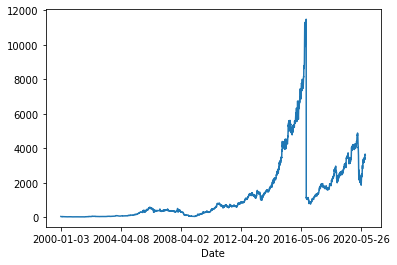

In [7]:
data['VWAP'].plot()

In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df = data.copy()

In [11]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [12]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [13]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [14]:
for feature in lag_features:
    df[feature+'rolling_mean_3']=df[feature].rolling(window=window1).mean()
    df[feature+'rolling_mean_7']=df[feature].rolling(window=window2).mean()

In [15]:
for feature in lag_features:
    df[feature+'rolling_std_3']=df[feature].rolling(window=window1).std()
    df[feature+'rolling_std_7']=df[feature].rolling(window=window2).std()

In [16]:
df.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [19]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [20]:
training_data = df[0:1800]
test_data = df[1800:]


In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [22]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.537, Time=50.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.224, Time=31.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.348, Time=32.92 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.320, Time=48.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=37.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.234, Time=48.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 248.251 seconds


In [23]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [24]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [25]:
test_data['Forecast_ARIMA']=forecast

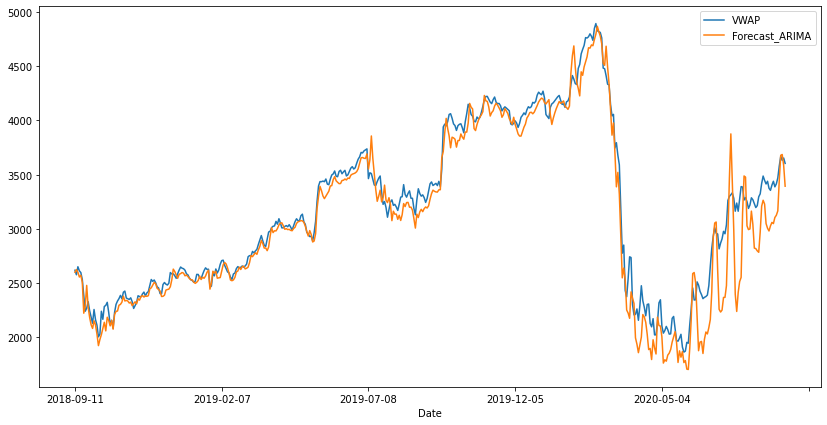

In [26]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

187.73967991065732

In [29]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

124.62860583925219